In [2]:
import re
import os
import pathlib
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import gridspec
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme(style="darkgrid")

# Root of the project
project_dir = pathlib.Path().resolve().parent

# Directory containing experiment results
results_dir = (pathlib.Path(project_dir) / "results").resolve()

# Directory for tidied data (output directory)
data_dir = (pathlib.Path(project_dir) / "data").resolve()

# Directory to store all plots
plot_dir = (pathlib.Path(project_dir) / "plots").resolve()

In [3]:
"""Load cleaned/aggregated data sets

Also fixes type hinting for pandas

resource_df -> CPU/Mem utilization for experiments
fortio_df -> Load test results from fortio
"""

resource_df = pd.read_csv(
    data_dir / "resource_results.csv",
    dtype={
        # "experiment": "category",
        # "mesh": "category",
        # "requested_qps": "category",
        "pod": "string",
        "container": "string",
    },
    parse_dates=["date"],
)


fortio_df = pd.read_csv(
    data_dir / "fortio_results.csv",
    dtype={
        # "experiment": "category",
        # # "mesh": "category",
        # "requested_qps": "category",
        # "protocol": "category",
        # "payload": "category",
        "actual_qps": "float64",
        "start": "float64",
        "end": "float64",
        "count": "uint64",
    },
    parse_dates=["date"],
)

In [4]:
# Prep data
df = fortio_df[fortio_df["experiment"] == "01_http_max_throughput"]

df = df[["mesh", "actual_qps"]].drop_duplicates()
df = df.sort_values(by="actual_qps", ascending=False)
df = df.reset_index(drop=True)
df.head()

,mesh,actual_qps
0,Baseline,21652.916972
1,Cilium,18009.233443
2,Linkerd,9756.589185
3,Istio,4324.863928
4,Traefik,565.807761


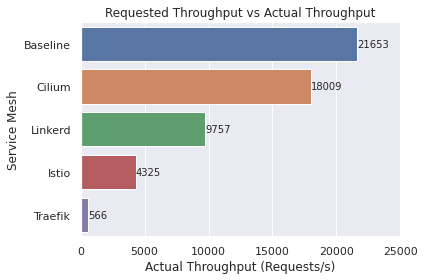

In [5]:
"""
Chart to show the average throughput
"""

fig, ax = plt.subplots()
ax = sns.barplot(data=df, x="actual_qps", y="mesh", ax=ax)

ax.set_xlim(0, 25000)


# # Show numbers on top of bars
ax.bar_label(ax.containers[0], label_type="edge", fmt="%.0f")

ax.set_xlabel("Actual Throughput (Requests/s)")
ax.set_ylabel("Service Mesh")
ax.set_title("Requested Throughput vs Actual Throughput")


fig.tight_layout()
fig.savefig(plot_dir / "exp-01_maximum_throughput_bar.pdf")


In [6]:
# Prep data
df = fortio_df[fortio_df["experiment"] == "01_http_max_throughput"]
df

,experiment,mesh,requested_qps,protocol,payload,actual_qps,date,start,end,count
747,01_http_max_throughput,Cilium,MAX,http,0,18009.233443,2022-06-27 11:36:24.504164386+00:00,0.056295,0.100000,49818000
748,01_http_max_throughput,Cilium,MAX,http,0,18009.233443,2022-06-27 11:36:24.504164386+00:00,0.100000,0.200000,391423000
749,01_http_max_throughput,Cilium,MAX,http,0,18009.233443,2022-06-27 11:36:24.504164386+00:00,0.200000,0.300000,400354000
750,01_http_max_throughput,Cilium,MAX,http,0,18009.233443,2022-06-27 11:36:24.504164386+00:00,0.300000,0.400000,456217000
751,01_http_max_throughput,Cilium,MAX,http,0,18009.233443,2022-06-27 11:36:24.504164386+00:00,0.400000,0.500000,429525000
...,...,...,...,...,...,...,...,...,...,...
966,01_http_max_throughput,Traefik,MAX,http,0,565.807761,2022-06-27 09:12:42.078435711+00:00,80.000000,90.000000,33247000
967,01_http_max_throughput,Traefik,MAX,http,0,565.807761,2022-06-27 09:12:42.078435711+00:00,90.000000,100.000000,193196000
968,01_http_max_throughput,Traefik,MAX,http,0,565.807761,2022-06-27 09:12:42.078435711+00:00,100.000000,200.000000,45340000
969,01_http_max_throughput,Traefik,MAX,http,0,565.807761,2022-06-27 09:12:42.078435711+00:00,200.000000,300.000000,929000


In [ ]:
df = df[df["mesh"] == "Baseline"]
df

,experiment,mesh,requested_qps,protocol,payload,actual_qps,date,start,end,count
884,01_http_max_throughput,Baseline,MAX,http,0,21652.916972,2022-06-26 14:31:58.681535434+00:00,0.046782,0.100000,175248000
885,01_http_max_throughput,Baseline,MAX,http,0,21652.916972,2022-06-26 14:31:58.681535434+00:00,0.100000,0.200000,552455000
886,01_http_max_throughput,Baseline,MAX,http,0,21652.916972,2022-06-26 14:31:58.681535434+00:00,0.200000,0.300000,552481000
887,01_http_max_throughput,Baseline,MAX,http,0,21652.916972,2022-06-26 14:31:58.681535434+00:00,0.300000,0.400000,574815000
888,01_http_max_throughput,Baseline,MAX,http,0,21652.916972,2022-06-26 14:31:58.681535434+00:00,0.400000,0.500000,618277000
889,01_http_max_throughput,Baseline,MAX,http,0,21652.916972,2022-06-26 14:31:58.681535434+00:00,0.500000,0.600000,716114000
890,01_http_max_throughput,Baseline,MAX,http,0,21652.916972,2022-06-26 14:31:58.681535434+00:00,0.600000,0.700000,599698000
891,01_http_max_throughput,Baseline,MAX,http,0,21652.916972,2022-06-26 14:31:58.681535434+00:00,0.700000,0.800000,607324000
892,01_http_max_throughput,Baseline,MAX,http,0,21652.916972,2022-06-26 14:31:58.681535434+00:00,0.800000,0.900000,503725000
893,01_http_max_throughput,Baseline,MAX,http,0,21652.916972,2022-06-26 14:31:58.681535434+00:00,0.900000,1.000000,802881000


<AxesSubplot:xlabel='count', ylabel='Count'>

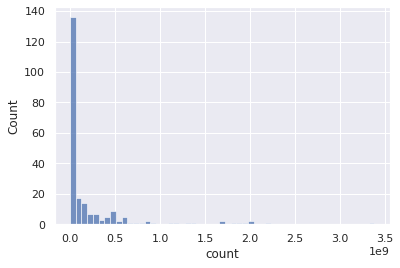

In [9]:
sns.histplot(data=df, x="count")